In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
trainset = torchvision.datasets.CIFAR10(root='./datasets', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [14]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

In [16]:
testset = torchvision.datasets.CIFAR10(root='./datasets', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [17]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [18]:
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [19]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
images_batch, labels_batch = iter(trainloader).next()

In [22]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [23]:
img = torchvision.utils.make_grid(images_batch)

In [24]:
img.shape

torch.Size([3, 36, 274])

In [25]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

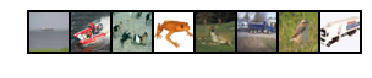

In [26]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [27]:
import torch.nn as nn

In [28]:
in_size = 3
hid1_size = 16
hid2_size = 32
out_size = len(labels)
k_conv_size = 5

In [29]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [30]:
model = ConvNet()

In [31]:
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
total_step = len(trainloader)
num_epochs = 5

In [34]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [2000/6250], Loss: 1.6763
Epoch [1/5], Step [4000/6250], Loss: 1.6522
Epoch [1/5], Step [6000/6250], Loss: 0.8708
Epoch [2/5], Step [2000/6250], Loss: 1.9779
Epoch [2/5], Step [4000/6250], Loss: 1.7737
Epoch [2/5], Step [6000/6250], Loss: 0.7484
Epoch [3/5], Step [2000/6250], Loss: 0.6719
Epoch [3/5], Step [4000/6250], Loss: 1.6311
Epoch [3/5], Step [6000/6250], Loss: 1.0359
Epoch [4/5], Step [2000/6250], Loss: 1.4063
Epoch [4/5], Step [4000/6250], Loss: 1.0297
Epoch [4/5], Step [6000/6250], Loss: 1.4482
Epoch [5/5], Step [2000/6250], Loss: 0.4948
Epoch [5/5], Step [4000/6250], Loss: 0.3796
Epoch [5/5], Step [6000/6250], Loss: 1.0670


In [35]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the model on the 1000 test images: {}%'.format(100 * correct / total))

Accuracy of the model on the 1000 test images: 68.35%
